In [114]:
import pandas as pd
import sys
sys.path.append(r'C:\Users\Rory\extra_repos\ruairitran\package')
from ephys_plots import heatmap_by_cluster
import os
import matplotlib.pyplot as plt

In [120]:
ifr_all = r'E:\db\ifr\dreadd.csv'
ifr_all = pd.read_csv(ifr_all)

In [6]:
df_clust = r'E:\db\excluded_dataset.csv'
df_clust = pd.read_csv(df_clust)

In [8]:
recordings = r'E:\db\recordings.csv'
recordings = pd.read_csv(recordings)

In [17]:
neurons = r'E:\db\neurons.csv'
neurons = pd.read_csv(neurons)

In [111]:
save_dir = r'E:\figures\inclustionexclusion\heatmaps'

In [124]:
todo = recordings[recordings['group_id']==6]['recording_id'].values
todo

array([40, 41, 42, 43, 44], dtype=int64)

In [122]:
def subset_recording(recording, ifr, df_clust):
    ids = neurons[neurons['recording_id']==recording]['neuron_id'].values.flatten()
    return ifr[list(map(str, ids))], df_clust[df_clust['recording_id']==recording]

def heatmap_by_recording(recording, ifr, df_clust):
    ifr, dfc = subset_recording(recording, ifr, df_clust)
    if len(ifr.columns) != 0:
        cm = heatmap_by_cluster(data_categories=dfc, data_ts=ifr)
        return cm
    else:
        return

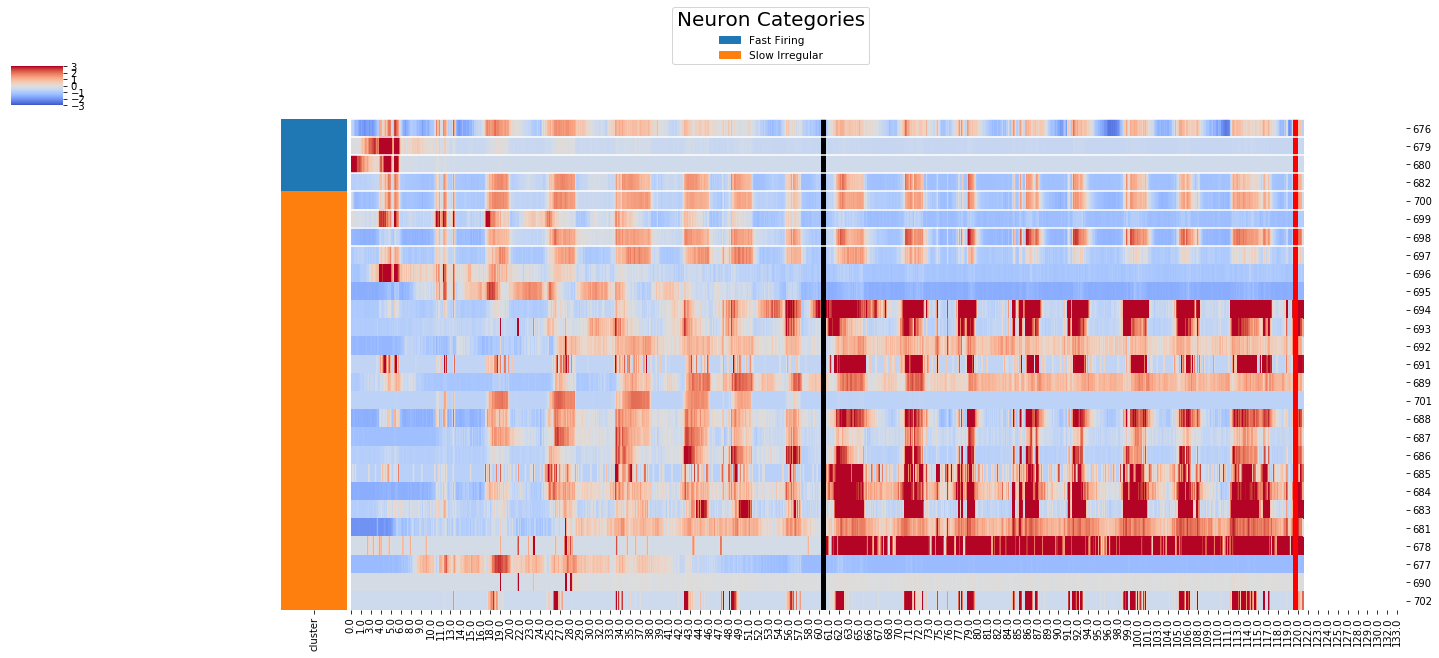

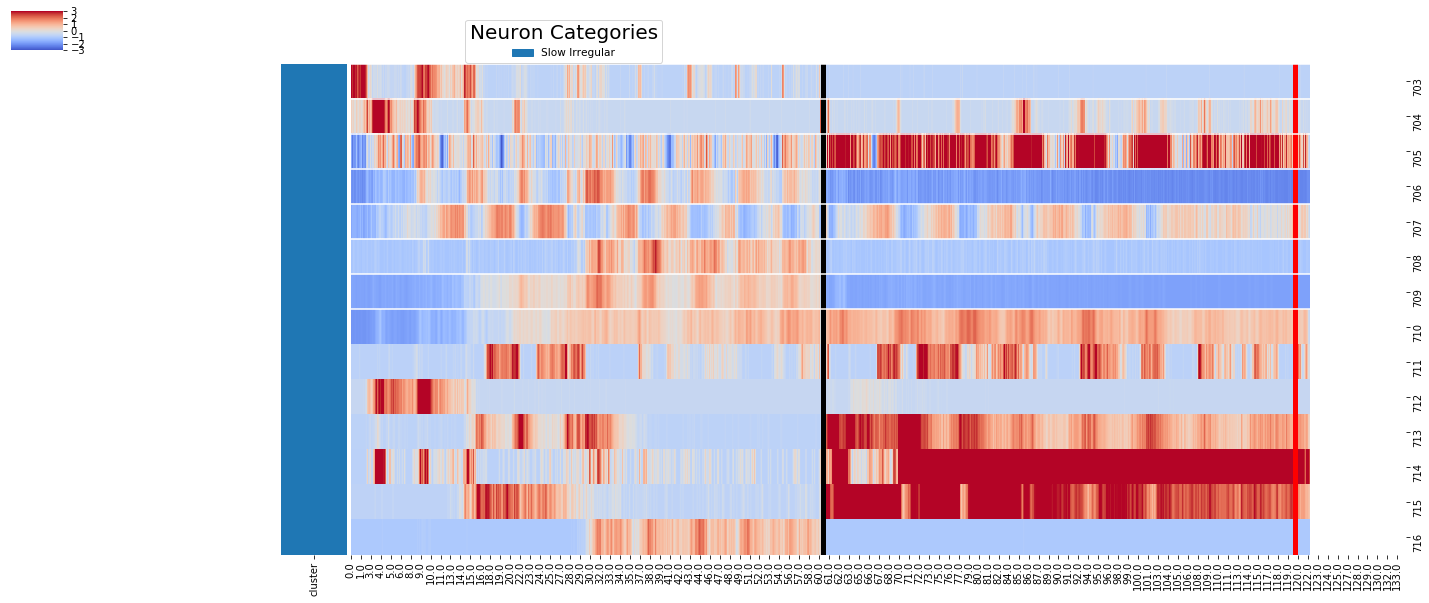

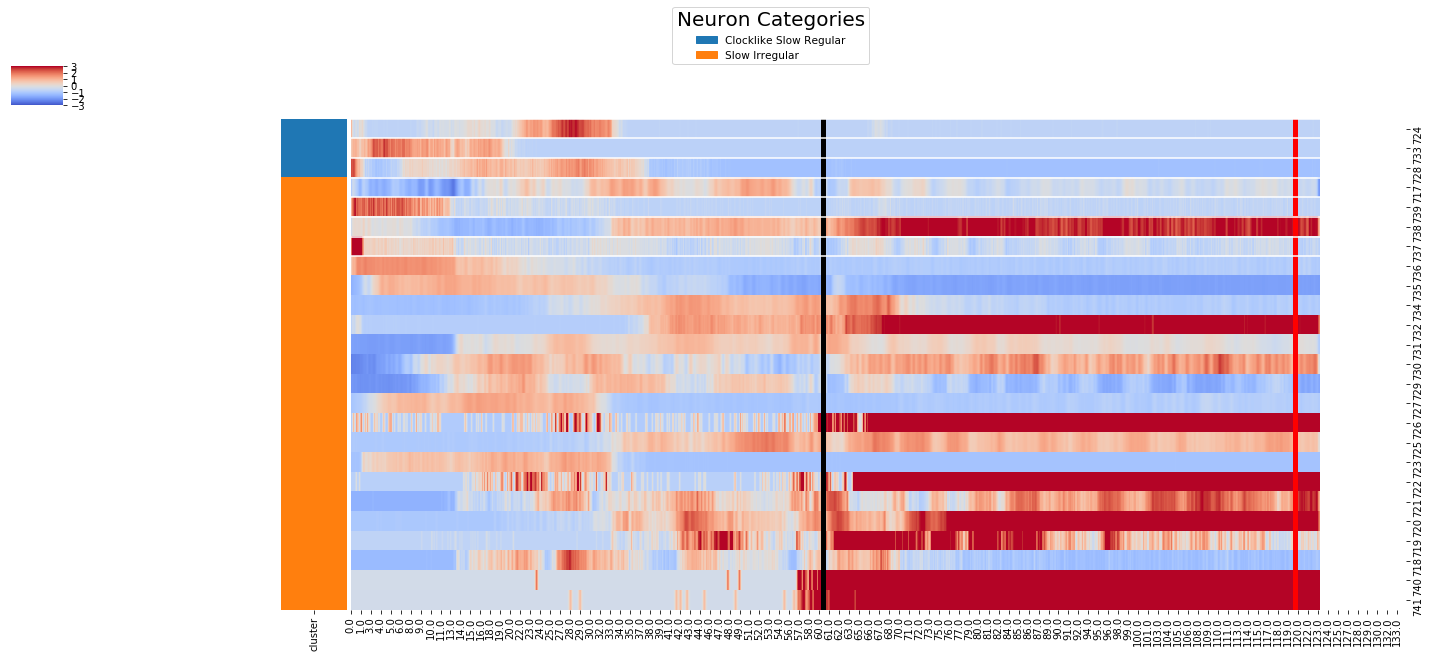

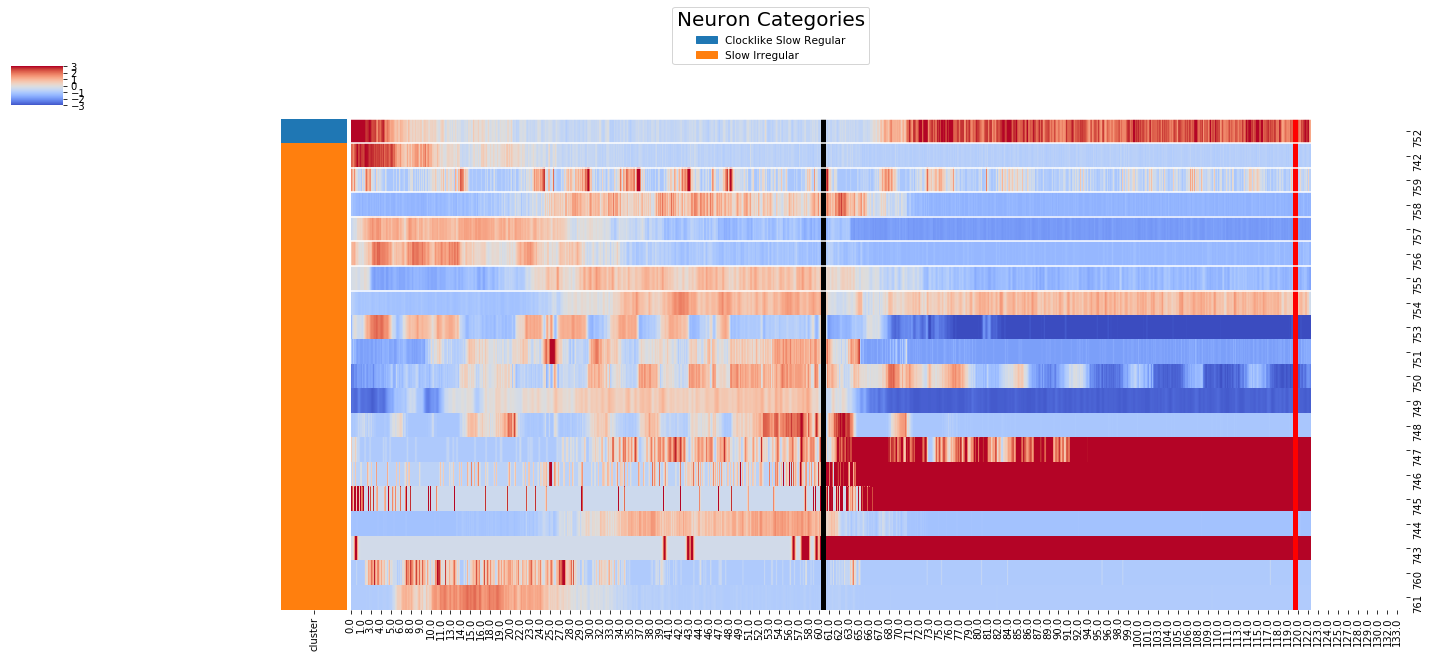

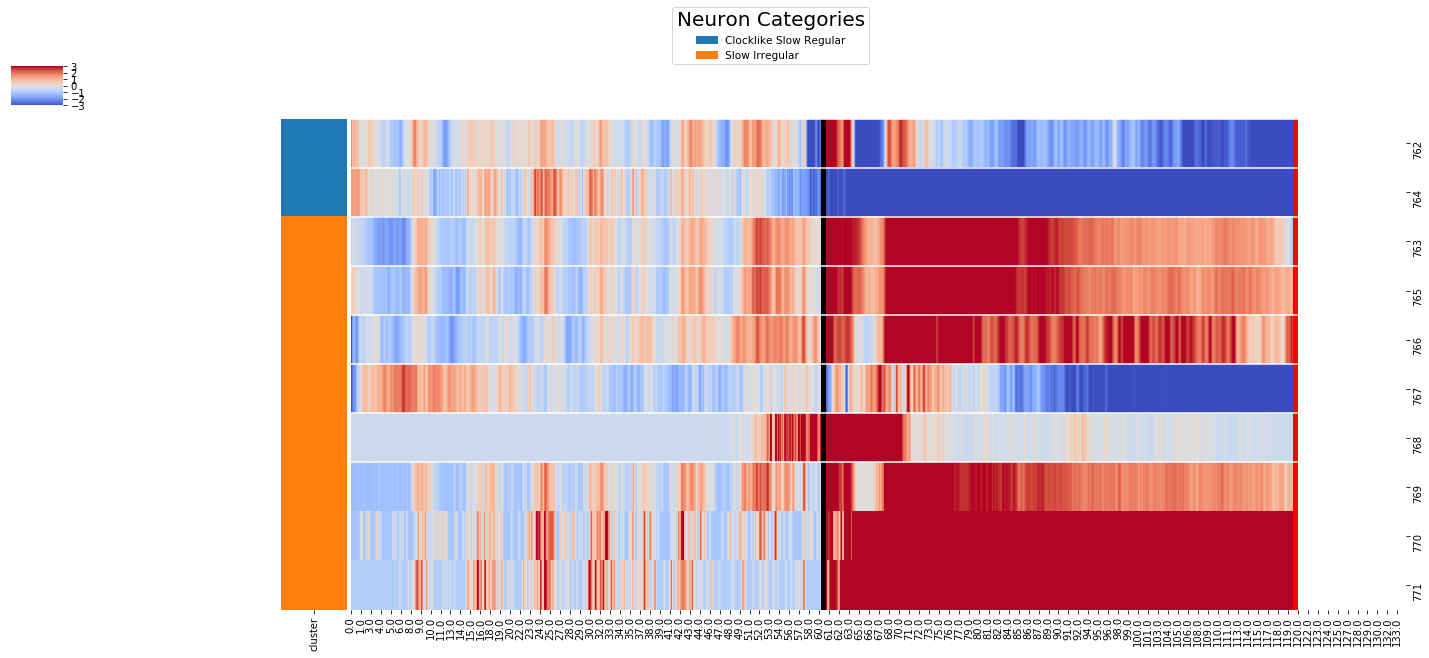

In [125]:
exp='gat_dreadd'
for recording in todo:
    cm = heatmap_by_recording(recording, ifr=ifr_all, df_clust=df_clust)
    plt.savefig(os.path.join(save_dir, f'{exp}_{recording}.png'), dpi=300)